In [152]:
# Import modules

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

Import CSV file of GPS locations flagged as within a store:

In [153]:
combined_flagged_df = pd.read_csv('../results/combined_full_flags.csv')
combined_flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609504091000,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999)
1,1609526776000,Rewe,place_198,1597,POINT (13.3697391 52.5239484)
2,1609514684000,McDonald's,place_14,1620,POINT (13.3078575 52.6356204)
3,1609459427000,Mercedes,place_233,2022,POINT (13.439094 52.505726)
4,1609508741000,Kaufland,place_215,2317,POINT (13.2192194 52.537559)
...,...,...,...,...,...
68174,1609772097000,Lexus,place_245,43335,POINT (13.520654 52.526376)
68175,1609772318000,Aldi,place_124,43343,POINT (13.514526 52.6405914)
68176,1609774542000,Lexus,place_245,43335,POINT (13.520568 52.526127)
68177,1609778427000,Lexus,place_245,43335,POINT (13.520101 52.52622)


Convert 'date' to datetime:

In [154]:
combined_flagged_df['date'] = pd.to_datetime(combined_flagged_df['date'], unit='ms').dt.normalize()

In [155]:
combined_flagged_df.head()

,date,store_name,store_id,device_id,gps_location
0,2021-01-01,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999)
1,2021-01-01,Rewe,place_198,1597,POINT (13.3697391 52.5239484)
2,2021-01-01,McDonald's,place_14,1620,POINT (13.3078575 52.6356204)
3,2021-01-01,Mercedes,place_233,2022,POINT (13.439094 52.505726)
4,2021-01-01,Kaufland,place_215,2317,POINT (13.2192194 52.537559)


In [156]:
date_grouped = combined_flagged_df.groupby(['date'], as_index=False).nunique().rename(
    columns={"device_id": "unique_visits", "gps_location": "total_signals"})
date_grouped

,date,store_name,store_id,unique_visits,total_signals
0,2021-01-01,8,57,96,194
1,2021-01-02,7,162,846,3835
2,2021-01-03,8,64,112,229
3,2021-01-04,9,169,809,3133
4,2021-01-05,9,160,706,2624
5,2021-01-06,8,167,719,2853
6,2021-01-07,9,170,787,3101
7,2021-01-08,8,171,900,3567
8,2021-01-09,9,171,971,4371
9,2021-01-10,9,65,128,396


Text(0.5, 1.0, 'Unique Store Visits per Day')

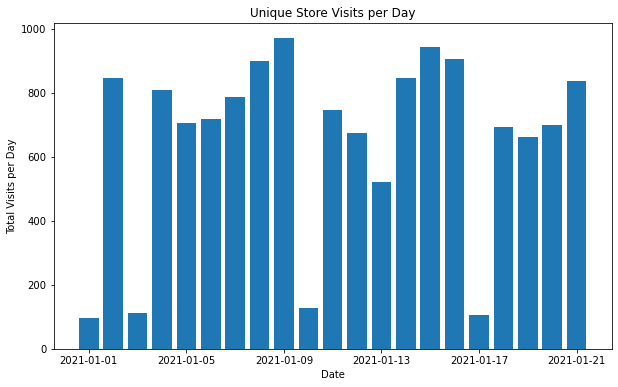

In [160]:
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(date_grouped['date'], date_grouped['unique_visits'])
plt.xlabel('Date')
plt.ylabel('Total Visits per Day')
plt.title('Unique Store Visits per Day')

Unsurprisingly, this graph shows a clear slump in GPS locations flagged as within stores on Sundays. There is an anomaly, but an expected one, as there is also a slump on New Year's Day.

In [162]:
#plt.savefig('../results/store_visits_per_day.png', bbox_inches='tight')